<h1>Table of Contents<span class="tocSkip"></span></h1>

# 1. Post-Covid Era

## 1.1 Specify Post-Covid Era

## 1.2 Load Data

## 1.2.1 Daily Confirmed Patients

In [1]:
import pandas as pd
from plotnine import *
from mizani.breaks import date_breaks
from mizani.formatters import date_format
from datetime import datetime
from math import sqrt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.font_manager as fm
font_location = 'C:/WINDOWS\/Fonts\/H2GSRB.TTF'
font_name = fm.FontProperties(fname = font_location).get_name()
from adjustText import adjust_text

In [2]:
time = pd.read_csv('C:/Users/jieun/Desktop/Covid_Analysis/KT_data_20200717/COVID_19/Time.csv')
time['date'] = [datetime.strptime(x, '%Y-%m-%d') for x in time['date']] # Change string to datetime object for better visualization
daily =[0] + [x - y for x,y in zip(time['confirmed'][1:],time['confirmed'])] # Number of daily confirmed patients
time['daily'] = daily

In [3]:
time

,date,time,test,negative,confirmed,released,deceased,daily
0,2020-01-20,16,1,0,1,0,0,0
1,2020-01-21,16,1,0,1,0,0,0
2,2020-01-22,16,4,3,1,0,0,0
3,2020-01-23,16,22,21,1,0,0,0
4,2020-01-24,16,27,25,2,0,0,1
...,...,...,...,...,...,...,...,...
158,2020-06-26,0,1232315,1200885,12602,11172,282,39
159,2020-06-27,0,1243780,1211261,12653,11317,282,51
160,2020-06-28,0,1251695,1219975,12715,11364,282,62
161,2020-06-29,0,1259954,1228698,12757,11429,282,42


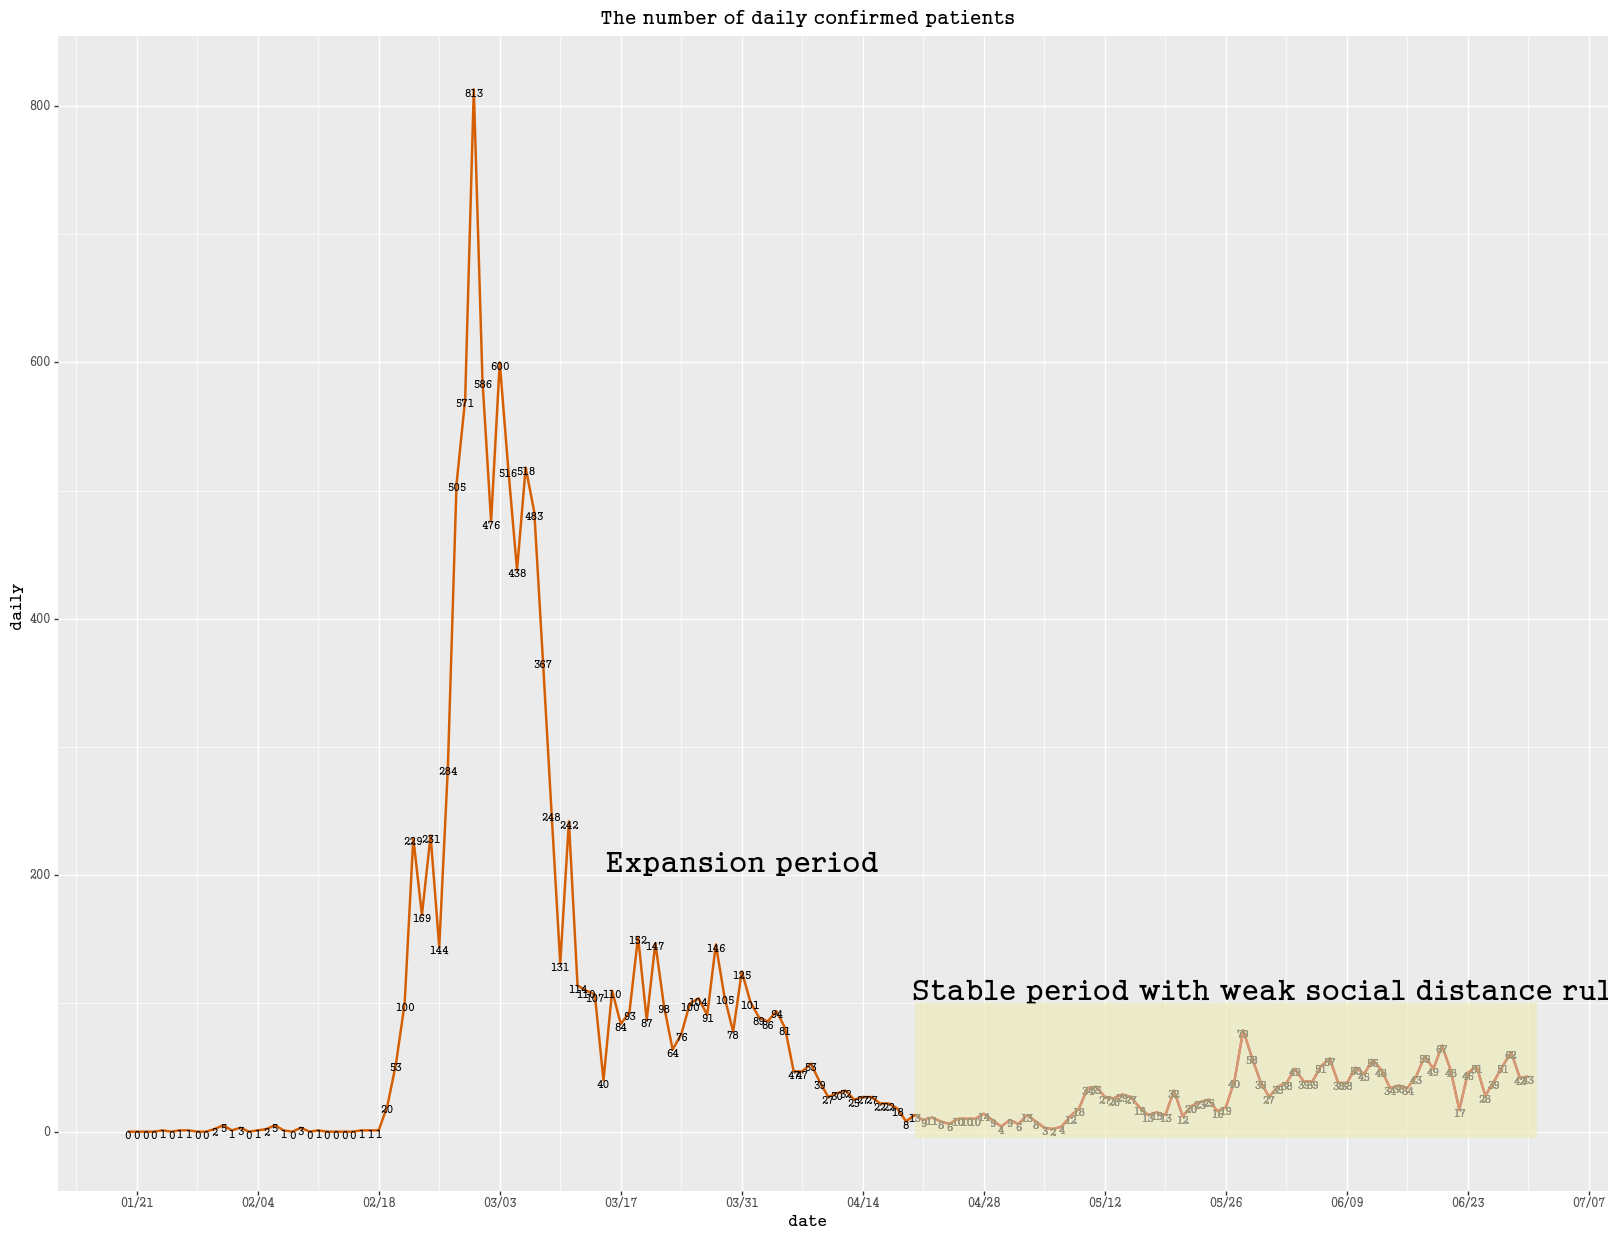

<ggplot: (-9223371890668181428)>

In [51]:
(ggplot(data=time,mapping=aes(x='date',y='daily',group=1))
+geom_line(color='#D55E00',size=1)
+ggtitle("The number of daily confirmed patients")
+scale_x_date(labels=date_format('%m/%d'),breaks=date_breaks('2 weeks'))
+theme(figure_size=(20,15),text=element_text(family=font_name))
+geom_text(aes(x='date',label='daily'),va='top',nudge_y=1,size =8)
+annotate(geom='text',x=datetime.strptime('2020-06-01','%Y-%m-%d'),y=100,label='Stable period with weak social distance rules',va='bottom',size=20)
+geom_rect(mapping=aes(xmin=datetime.strptime('2020-04-20','%Y-%m-%d'),
              xmax = datetime.strptime('2020-07-01','%Y-%m-%d'),
              ymin=-5,ymax=100),fill ='#F4EDCA',alpha=0.01)
+annotate(geom='text',x=datetime.strptime('2020-03-31','%Y-%m-%d'),y=200,label='Expansion period',va='bottom',size=20)
)

### 1.2.2 Card Sales Data

In [5]:
card = pd.read_csv("C:/Users/jieun/Desktop/Covid_Analysis/KT_data_20200717/card_20200717.csv")
card

,date_receipt,district_code,district_name,industry_code,industry_name,sales_count,sales_amount
0,20200104,1174066000,성내3동,7041,약국,463,5843230
1,20200104,1174066000,성내3동,7022,치과의원,33,7835550
2,20200104,1174066000,성내3동,7021,한의원,53,4589800
3,20200104,1174066000,성내3동,7020,의원,339,9267240
4,20200104,1174066000,성내3동,6110,자동차정비,19,4441000
...,...,...,...,...,...,...,...
3713947,20200614,1121586000,구의2동,4004,대형할인점,136,1195640
3713948,20200614,1121584700,자양4동,9010,인테 리어,2,13100
3713949,20200614,1162052500,보라매동,6140,주 차 장,2,14500
3713950,20200614,1135056000,월계1동,9998,기타전문점,1,38000


In [6]:
tot=len(card['industry_name'].unique())
print("The total number of the type of industry is", tot)

The total number of the type of industry is 260


In [7]:
col = list(set(card['industry_name']))
col.sort()

In [8]:
category = ['숙박업','숙박업','방송','홈쇼핑','연료','송금','상품권','패션','가전','가전','요식','건강','건강','건축','서비스',
'운송','잡화','스포츠','스포츠','스포츠','공공요금','공공요금','매점/편의점','설비','관광','교육','매점/편의점','자동차','자동차',
'패션','설비','관광','교육','교육','운송','가구','건강','건축','설비','운송','농업','서비스','스포츠','보험','유통',
'문구','문구','기타','숙박업','연료','서비스','유통','요식','의료','의류','자동차','잡화','기기','기타','주방','의류',
'회원제','회원제','회원제','회원제','회원제','의류','기기','유흥','농업','식품','식품','유흥','의류','스포츠','교육',
'대형할인점','교육','동물','스포츠','스포츠','렌트','의류','면세점','문구','문화','미용','식품','미용','예술','법률','법률','의료',
'보관창고','교육','인테리어','스포츠','부동산','부동산','비영리','농업','기타','비영리','사무','사무','사무','사무','개인',
'사우나','서비스','의료','상품권','상품권','보험','요식','문구','잡화','자동차','생활','컴퓨터','보험','스포츠','문화','자동차',
'대형마트','스포츠','식품','스포츠','스포츠','스포츠','패션','패션','잡화','의류','예술','패션','패션','마사지','동물','약국',
'잡화','운송','문구','문화','교육','의류','의류','문구','교육','면세점','방송','급식업','설비','연료','교육','교육','교육(해외)',
'유흥','설비','의료','의료','미용','통신','자동차','건강','인터넷쇼핑','인터넷쇼핑','인터넷쇼핑','인테리어','가구','문구',
'백화점','요식','요식','자동차','자동차','자동차','자동차','백화점','기타','장례','연료','문구','상우회','상품권(전자상)',
'상품권(전자상)','가전','식품','정기간행물','정보','의류','패션','식품','의료','가전','의료','조세','조세','스포츠','의료',
'용역','연료','자동차','주류','주방','주방','주점','자동차','자동차','요식','건축','운송','가구','교육','총포류','인쇄','의료',
'의료','생활','문화','자동차','카지노','주점','의류','컴퓨터','교육','숙박업','운송','운송','스포츠','통신','통신','통신','통신',
'통신','통신','통신','통신','숙박업','문화','인테리어','매점/편의점','미용','예술','교육','교육','의료','의료','의료','요식',
'항공','스포츠','혼례','혼례','건강','예술','문화','미용','유통','예술']

In [9]:
d= {} 
for i in range(260):
    d[col[i]] = category[i]

In [10]:
# Mapping (전처리)
sales = card.groupby(['industry_name','date_receipt']).sum()['sales_amount'].reset_index()
sales.industry_name = sales.industry_name.replace(d)
sales.date_receipt = [datetime.strptime(str(x),'%Y%m%d').month for x in sales.date_receipt]
sales = sales.groupby(['industry_name','date_receipt']).sum()['sales_amount'].reset_index()
sales = sales[sales.date_receipt !=6]
remove = ['공공요금','개인','기타','비영리','상우회','정보','회원제','총포류','카지노','송금','조세','농업','설비']
sales = sales[~sales.industry_name.isin(remove)]
sales = sales.rename(columns={"date_receipt": "month"})

So far, we narrowed down 260 industries to 72 industries, and summed up the monthly sales data via groupby.<br>

We removed the following data:
* Data which does not exist from January to May (Example: Casino, Transfer, Gun)
* June data as there is no data after 14th June 
* Data without clear label (Example: etcetra)
* Data without a direct relation with consumer (Example: Nonprofit organization) 
* Data with strong seasonality (Example: Agriculture)

Now we have a new dataframe with __60 industries__.

In [11]:
sales

,industry_name,month,sales_amount
0,가구,1,2734031138
1,가구,2,5263670744
2,가구,3,7350019593
3,가구,4,7444856482
4,가구,5,10090247588
...,...,...,...
415,홈쇼핑,1,21671234046
416,홈쇼핑,2,27959045287
417,홈쇼핑,3,49946896911
418,홈쇼핑,4,43336918164


In [12]:
sales.industry_name.unique()

array(['가구', '가전', '건강', '건축', '관광', '교육', '교육(해외)', '급식업', '기기', '대형마트',
       '대형할인점', '동물', '렌트', '마사지', '매점/편의점', '면세점', '문구', '문화', '미용',
       '방송', '백화점', '법률', '보관창고', '보험', '부동산', '사무', '사우나', '상품권',
       '상품권(전자상)', '생활', '서비스', '숙박업', '스포츠', '식품', '약국', '연료', '예술',
       '요식', '용역', '운송', '유통', '유흥', '의료', '의류', '인쇄', '인터넷쇼핑', '인테리어',
       '자동차', '잡화', '장례', '정기간행물', '주류', '주방', '주점', '컴퓨터', '통신', '패션',
       '항공', '혼례', '홈쇼핑'], dtype=object)

In [13]:
# Translate Korean into English

sales['industry_name'] = sales['industry_name'].replace(['가구', '가전', '건강', '건축', '관광', '교육', '교육(해외)', '급식업', '기기', '대형마트',
       '대형할인점', '동물', '렌트', '마사지', '매점/편의점', '면세점', '문구', '문화', '미용',
       '방송', '백화점', '법률', '보관창고', '보험', '부동산', '사무', '사우나', '상품권',
       '상품권(전자상)', '생활', '서비스', '숙박업', '스포츠', '식품', '약국', '연료', '예술',
       '요식', '용역', '운송', '유통', '유흥', '의료', '의류', '인쇄', '인터넷쇼핑', '인테리어',
       '자동차', '잡화', '장례', '정기간행물', '주류', '주방', '주점', '컴퓨터', '통신', '패션',
       '항공', '혼례', '홈쇼핑'],['Furniture','Home appliances','Health','Architecture','Tourism','Education','Education(overseas)','Catering business','Devices','Large mart','Large discount store', 'Animal','Rent','Massage','Convenience Store','Duty Free Shop','Stationery','Culture','Beauty','Broadcasting','Department Store','Legal','Storage Warehouse' ,'Insurance','Real estate','Administration','Sauna','Gift card','Gift card(e-commerce)','Life','Service','Accommodation','Sports','Food', ' Pharmacy','Fuel','Art','Restaurant','Labor','Transport','Distribution','Entertainment','Medical','Clothing','Print','Online shopping','Interior ','Car','Miscellaneous goods','Funeral','Periodical','Liquor','Kitchen','Bar','Computer','Communication','Fashion','Aviation','Wedding' , 'Home shopping'])

In [14]:
sales

,industry_name,month,sales_amount
0,Furniture,1,2734031138
1,Furniture,2,5263670744
2,Furniture,3,7350019593
3,Furniture,4,7444856482
4,Furniture,5,10090247588
...,...,...,...
415,Home shopping,1,21671234046
416,Home shopping,2,27959045287
417,Home shopping,3,49946896911
418,Home shopping,4,43336918164


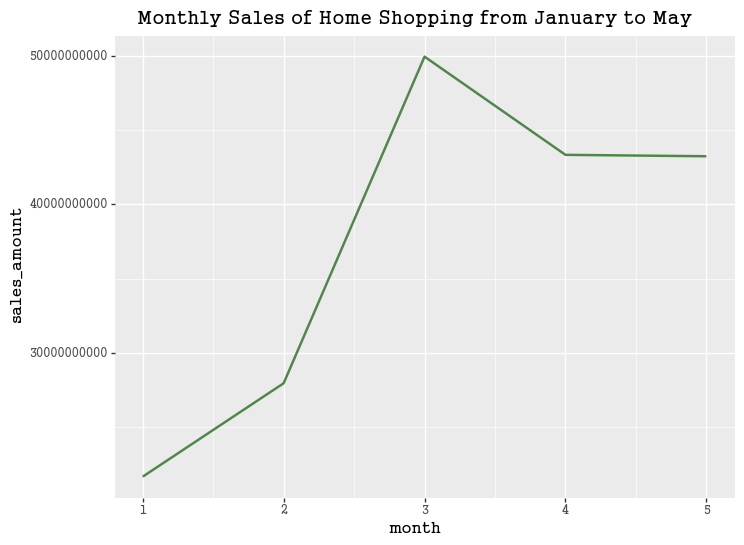

<ggplot: (-9223371890672893568)>

In [30]:
(ggplot(sales[sales.industry_name=='Home shopping'])
+geom_line(aes(y='sales_amount',x='month',group='industry_name'),color='#52854C',size=1)
+ggtitle('Monthly Sales of Home Shopping from January to May')
+theme(figure_size=(8,6),text=element_text(family=font_name))
)

### 1.2.3 Naver Shopping Insight

Naver, often referred to as 'Google of South Korea', is a Korean online platform with the comprehensive search engine. Naver features a broad range of services from e-mail, news, and blog to the world's first online Q&A platform. Here, **we will use data from 'Naver Shopping Insight' which provides shopping data based on the amount of user's click.** Note that this data is __supplementary data__ (not main data) to verify our analysis. This is because 1) this data is difficult to categorize by industry and 2) they mainly consists of online purchasable goods

Data source: https://datalab.naver.com/shoppingInsight/sCategory.naver (availalbe as csv file)

In [47]:
health_naver = pd.read_csv('C:/Users/jieun/Desktop/Covid_Analysis/naver/health.csv')
rent_naver = pd.read_csv('C:/Users/jieun/Desktop/Covid_Analysis/naver/rental_car.csv')
tour_naver = pd.read_csv('C:/Users/jieun/Desktop/Covid_Analysis/naver/overseas_tour.csv')
duty_naver = pd.read_csv('C:/Users/jieun/Desktop/Covid_Analysis/naver/duty_free.csv')

In [48]:
health_naver['date'] = [datetime.strptime(x,'%Y-%m-%d') for x in health_naver['date']]
rent_naver['date'] = [datetime.strptime(x,'%Y-%m-%d') for x in rent_naver['date']]
tour_naver['date'] = [datetime.strptime(x,'%Y-%m-%d') for x in tour_naver['date']]
duty_naver['date'] = [datetime.strptime(x,'%Y-%m-%d') for x in duty_naver['date']]

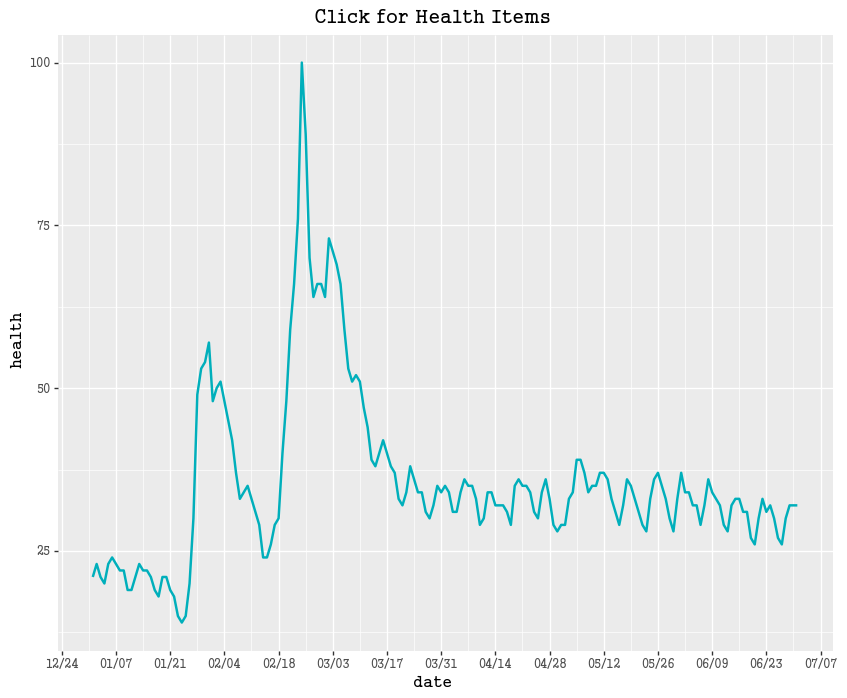

<ggplot: (-9223371890667757136)>

In [52]:
(ggplot(data=health_naver,mapping=aes(x='date',y='health',group=1))
+geom_line(color='#00AFBB',size=1)
+ggtitle("Click for Health Items")
+scale_x_date(labels=date_format('%m/%d'),breaks=date_breaks('2 weeks'))
+theme(figure_size=(10,8),text=element_text(family=font_name))
)

# 2. Risk Index

\begin{equation}
Risk Index = \sqrt{(R_1+1)(R_2+1)}-1
\end{equation}

In [19]:
sales_tmp = sales.copy()
sales_tmp.loc[sales.sales_amount<0,'sales_amount'] = 1e-6

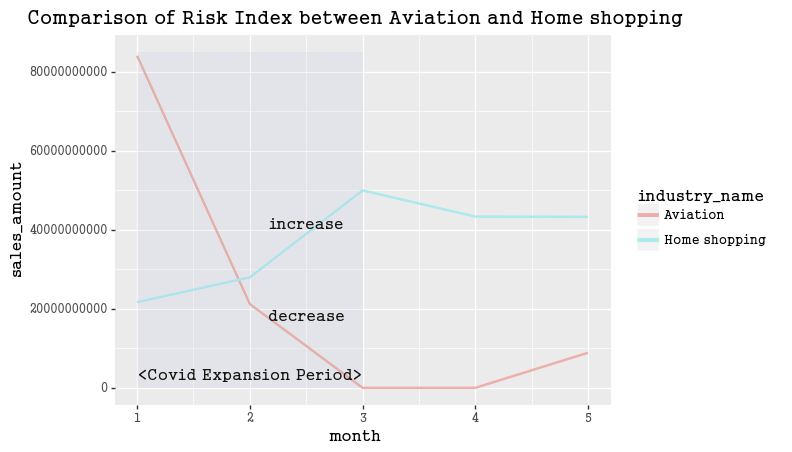

<ggplot: (-9223371890672845016)>

In [20]:
(ggplot(sales_tmp[sales_tmp.industry_name.isin(['Aviation','Home shopping'])])
+geom_line(aes(x='month',y= 'sales_amount',group='industry_name',color='industry_name'),size=1)
+theme(text=element_text(family=font_name))
+annotate(geom='text',x=2.5,y=20000000000,label='decrease',va='top') 
+annotate(geom='text',x=2.5,y=40000000000,label='increase',va='bottom')
+annotate(geom='text',x=2,y=5000000000,label='<Covid Expansion Period>',va='top') 
+ggtitle('Comparison of Risk Index between Aviation and Home shopping')
+geom_rect(mapping=aes(xmin=1,xmax =3, ymin=0,ymax=85000000000),fill ='#E3E4EA',alpha=0.01)
+scale_colour_hue(l=0.8)
)

In [21]:
# Risk Index 
cat = sales[sales.month==2]['industry_name']
risk2 = [x/y for x,y in zip(sales_tmp[sales_tmp.month==2]['sales_amount'],sales_tmp[sales_tmp.month==1]['sales_amount'])]
risk3 = [x/y for x,y in zip(sales_tmp[sales_tmp.month==3]['sales_amount'],sales_tmp[sales_tmp.month==2]['sales_amount'])]
risk_data = pd.DataFrame({'cat':cat,'risk_2':risk2,'risk_3':risk3})
risk_data['risk_index'] = [sqrt(x*y)-1 for x,y in zip(risk_data.risk_2,risk_data.risk_3)]

In [22]:
risk_data

,cat,risk_2,risk_3,risk_index
1,Furniture,1.925242,1.396368e+00,0.639617
7,Home appliances,1.322256,1.599687e+00,0.454371
19,Health,1.242063,9.690543e-01,0.097099
25,Architecture,1.673405,1.437885e+00,0.551182
37,Tourism,0.255478,3.022947e-01,-0.722098
43,Education,1.275809,9.358870e-01,0.092709
49,Education(overseas),1.827017,8.436713e-01,0.241532
55,Catering business,1.255577,1.111554e+00,0.181373
61,Devices,1.427584,1.247770e+00,0.334652
79,Large mart,0.832159,1.522872e+00,0.125731
